In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Spotify_Youtube.csv')


In [16]:
df = df.drop_duplicates()	

In [17]:
df = df.dropna()

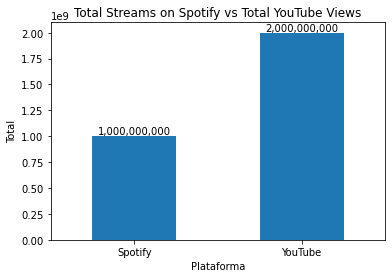

In [90]:
# # Create a DataFrame  
df = pd.DataFrame({'Plataforma': ['Spotify', 'YouTube'],
                   'Total': [1000000000, 2000000000]})

# Create a bar chart
ax = df.plot(x='Plataforma', y='Total', kind='bar', rot=0, legend=None)

# Configure the axis labels and chart title
ax.set_xlabel('Plataforma')
ax.set_ylabel('Total')
ax.set_title('Total Streams on Spotify vs Total YouTube Views')

# Add the values inside the columns
for rect in ax.containers:
    ax.bar_label(rect, label_type='edge', labels=[f'{h.get_height():,d}' for h in rect])

# Display the graph
plt.show()


<Figure size 720x504 with 0 Axes>

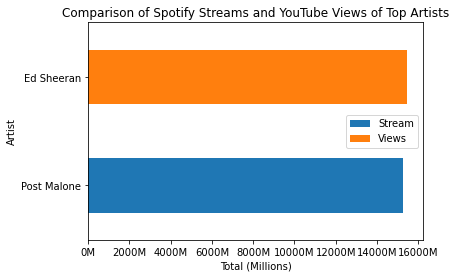

In [21]:
# Filter artists with non-zero Spotify URLs and calculate the sum of streams for each artist
top_artists_spotify = df[df['Url_spotify'].notna()].groupby('Artist')['Stream'].sum()

# Filter artists with non-zero YouTube URLs and calculate the sum of views for each artist
top_artists_youtube = df[df['Url_youtube'].notna()].groupby('Artist')['Views'].sum()

# Get the most listened artist on Spotify
top_artist_spotify = top_artists_spotify.nlargest(1)

# Get the most viewed artist on YouTube
top_artist_youtube = top_artists_youtube.nlargest(1)

# Create a new DataFrame with the main artists' data
df_top_artists = pd.concat([top_artist_spotify, top_artist_youtube], axis=1)

plt.figure(figsize=(10, 7))

# Create a horizontal bar chart
ax = df_top_artists.plot(kind='barh', stacked=True)

# Format the X axis tick labels to display numbers in millions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.0f}M'))

# Configure the axis legends and chart title
ax.set_xlabel('Total (Millions)')
ax.set_ylabel('Artist')
ax.set_title('Comparison of Spotify Streams and YouTube Views of Top Artists')

# Display the graph
plt.show()


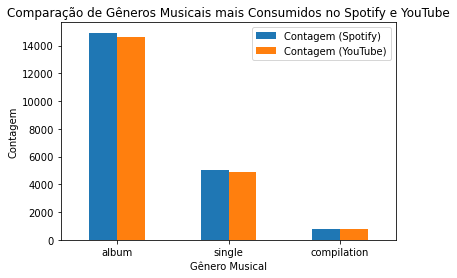

In [70]:
import matplotlib.pyplot as plt

# Calculate music genre count on Spotify and YouTube
top_genres_spotify = df[df['Url_spotify'].notna()]['Album_type'].value_counts().nlargest(5)
top_genres_youtube = df[df['Url_youtube'].notna()]['Album_type'].value_counts().nlargest(5)

# Create a new DataFrame with the music genre data
df_top_genres = pd.concat([top_genres_spotify, top_genres_youtube], axis=1)
df_top_genres.columns = ['Contagem (Spotify)', 'Contagem (YouTube)']

# Generate the comparison bar chart
ax = df_top_genres.plot(kind='bar', rot=0)
ax.set_xlabel('Gênero Musical')
ax.set_ylabel('Contagem')
ax.set_title('Comparação de Gêneros Musicais mais Consumidos no Spotify e YouTube')
plt.show()

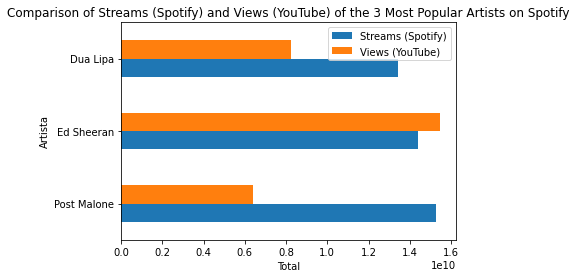

In [25]:
# Get the data of the 3 most popular artists on Spotify
top_artists_spotify = df[df['Url_spotify'].notna()].groupby('Artist')['Stream'].sum().nlargest(3)

# Get YouTube views data for Spotify artists
top_artists_youtube = df[df['Artist'].isin(top_artists_spotify.index) 
                         & df['Url_youtube'].notna()].groupby('Artist')['Views'].sum()

# Create a new DataFrame with the artists' data
df_top_artists = pd.concat([top_artists_spotify, top_artists_youtube], axis=1)
df_top_artists.columns = ['Streams (Spotify)', 'Views (YouTube)']

# Generate the comparison bar chart as horizontal
ax = df_top_artists.plot(kind='barh')
ax.set_xlabel('Total')
ax.set_ylabel('Artista')
ax.set_title('Comparison of Streams (Spotify) and Views (YouTube) of the 3 Most Popular Artists on Spotify')
plt.show()


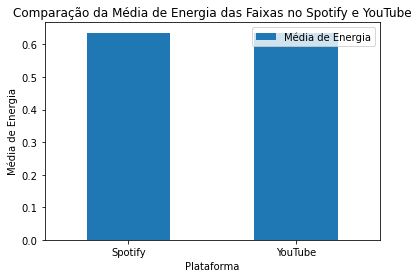

In [23]:
import matplotlib.pyplot as plt

# Calculate the average power of tracks on Spotify and YouTube
avg_energy_spotify = df[df['Url_spotify'].notna()]['Energy'].mean()
avg_energy_youtube = df[df['Url_youtube'].notna()]['Energy'].mean()

# Create a DataFrame with the average energy data
df_avg_energy = pd.DataFrame({'Média de Energia': [avg_energy_spotify, avg_energy_youtube]},
                            index=['Spotify', 'YouTube'])

# Generate the comparison bar chart
ax = df_avg_energy.plot(kind='bar', rot=0)
ax.set_xlabel('Plataforma')
ax.set_ylabel('Média de Energia')
ax.set_title('Comparação da Média de Energia das Faixas no Spotify e YouTube')
plt.show()


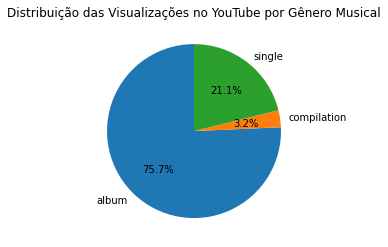

In [24]:
import matplotlib.pyplot as plt

# Filter the DataFrame to get YouTube views data by music genre
df_youtube_genre = df[df['Url_youtube'].notna()].groupby('Album_type')['Views'].sum()

# Generate the pie chart of the distribution of views by music genre
ax = df_youtube_genre.plot(kind='pie', autopct='%1.1f%%', startangle=90)
ax.set_ylabel('')
ax.set_title('Distribuição das Visualizações no YouTube por Gênero Musical')
plt.show()


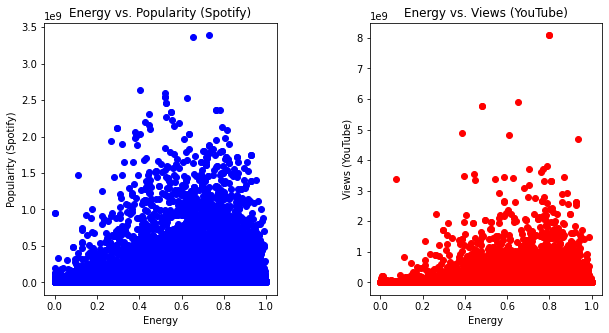

In [28]:
# Select the columns of interest
df_energy_popularity_spotify = df[df['Url_spotify'].notna()][['Energy', 'Stream']]
df_energy_popularity_youtube = df[df['Url_youtube'].notna()][['Energy', 'Views']]

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Generate the scatter plot for Spotify on the left subplot
axes[0].scatter(df_energy_popularity_spotify['Energy'], df_energy_popularity_spotify['Stream'], color='blue')
axes[0].set_xlabel('Energy')
axes[0].set_ylabel('Popularity (Spotify)')
axes[0].set_title('Energy vs. Popularity (Spotify)')

# Generate the scatter plot for YouTube on the right subplot
axes[1].scatter(df_energy_popularity_youtube['Energy'], df_energy_popularity_youtube['Views'], color='red')
axes[1].set_xlabel('Energy')
axes[1].set_ylabel('Views (YouTube)')
axes[1].set_title('Energy vs. Views (YouTube)')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()


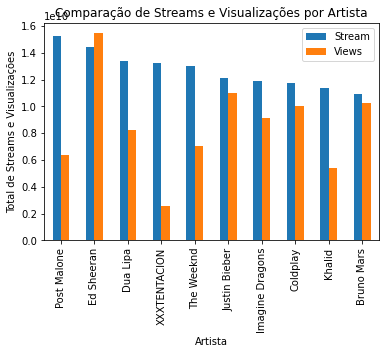

In [26]:
# Gráfico de barras comparando o número total de streams no Spotify e o número total de visualizações no YouTube para os 10 artistas mais populares
top_artists = df.groupby('Artist').sum().nlargest(10, 'Stream')
ax = top_artists[['Stream', 'Views']].plot(kind='bar')
ax.set_xlabel('Artista')
ax.set_ylabel('Total de Streams e Visualizações')
ax.set_title('Comparação de Streams e Visualizações por Artista')
plt.show()


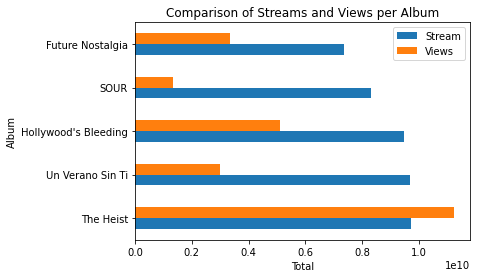

In [35]:
# Select the 5 most popular albums based on total streams
top_albums = df.groupby('Album').sum().nlargest(5, 'Stream')

# Generate the horizontal bar chart
ax = top_albums[['Stream', 'Views']].plot(kind='barh')
ax.set_xlabel('Total')
ax.set_ylabel('Album')
ax.set_title('Comparison of Streams and Views per Album')
plt.show()


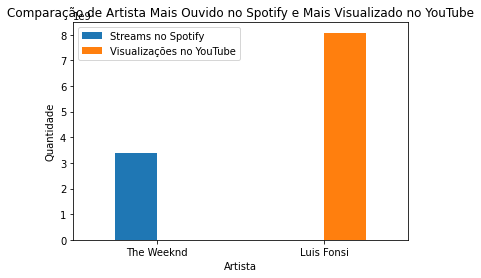

In [38]:
# Identify the most listened artist on Spotify
registro_mais_ouvido_spotify = df[df['Stream'] == df['Stream'].max()]

# Get the artist name and number of streams on Spotify
artista_mais_ouvido_spotify = registro_mais_ouvido_spotify['Artist'].values[0]
streams_mais_ouvido_spotify = registro_mais_ouvido_spotify['Stream'].values[0]

# Identify the artist with the most views on YouTube
registro_mais_visualizacoes_youtube = df[df['Views'] == df['Views'].max()]

# Get the artist name and number of views on YouTube
artista_mais_visualizacoes_youtube = registro_mais_visualizacoes_youtube['Artist'].values[0]
visualizacoes_mais_youtube = registro_mais_visualizacoes_youtube['Views'].values[0]

# Create a DataFrame with the data from the two artists
dados_artistas = pd.DataFrame({'Artista': [artista_mais_ouvido_spotify, artista_mais_visualizacoes_youtube],
                               'Streams no Spotify': [streams_mais_ouvido_spotify, 0],
                               'Visualizações no YouTube': [0, visualizacoes_mais_youtube]})

# Create the bar chart
ax = dados_artistas.plot(x='Artista', kind='bar', rot=0)
ax.set_ylabel('Quantidade')
ax.set_title('Comparação de Artista Mais Ouvido no Spotify e Mais Visualizado no YouTube')
plt.show()


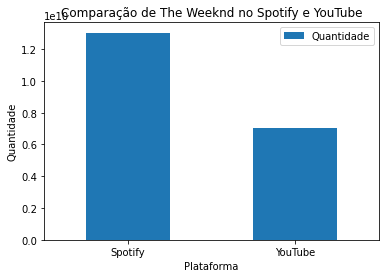

In [53]:

# Filter the records of the artist "The Weeknd
the_weeknd_spotify = df[df['Artist'] == 'The Weeknd'][['Artist', 'Stream']]
the_weeknd_youtube = df[df['Artist'] == 'The Weeknd'][['Artist', 'Views']]

# Get the total streams on Spotify and views on YouTube for The Weeknd
total_streams_spotify = the_weeknd_spotify['Stream'].sum()
total_visualizacoes_youtube = the_weeknd_youtube['Views'].sum()

# Create a DataFrame with The Weeknd's data
dados_the_weeknd = pd.DataFrame({'Plataforma': ['Spotify', 'YouTube'],
                               'Quantidade': [total_streams_spotify, total_visualizacoes_youtube]})

# Create the bar chart
ax = dados_the_weeknd.plot(x='Plataforma', y='Quantidade', kind='bar', rot=0)
ax.set_ylabel('Quantidade')
ax.set_title('Comparação de The Weeknd no Spotify e YouTube')
plt.show()


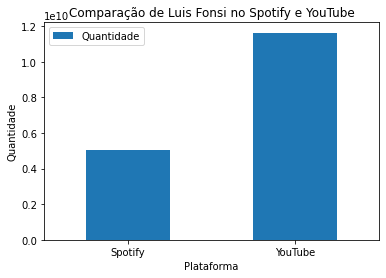

In [54]:

# Filter the records of the artist "The Weeknd
the_weeknd_spotify = df[df['Artist'] == 'Luis Fonsi'][['Artist', 'Stream']]
the_weeknd_youtube = df[df['Artist'] == 'Luis Fonsi'][['Artist', 'Views']]

# Get the total streams on Spotify and views on YouTube for The Weeknd
total_streams_spotify = the_weeknd_spotify['Stream'].sum()
total_visualizacoes_youtube = the_weeknd_youtube['Views'].sum()

# Create a DataFrame with The Weeknd's data
dados_the_weeknd = pd.DataFrame({'Plataforma': ['Spotify', 'YouTube'],
                               'Quantidade': [total_streams_spotify, total_visualizacoes_youtube]})

# Create the bar chart
ax = dados_the_weeknd.plot(x='Plataforma', y='Quantidade', kind='bar', rot=0)
ax.set_ylabel('Quantidade')
ax.set_title('Comparação de Luis Fonsi no Spotify e YouTube')
plt.show()


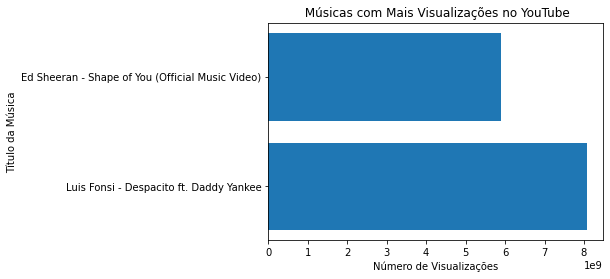

In [10]:
# Sort the DataFrame by number of views in descending order
df_sorted_by_views = df.sort_values('Views', ascending=False)

# Select the first 3 lines (songs) with the most views
top_2_songs_by_views = df_sorted_by_views.head(3)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.barh(top_2_songs_by_views['Title'], top_2_songs_by_views['Views'])

# Set up the axis labels and chart title
ax.set_xlabel('Número de Visualizações')
ax.set_ylabel('Título da Música')
ax.set_title(' Músicas com Mais Visualizações no YouTube')

# Display the graph
plt.show()
